## Principal Component Analysis applied to the Iris dataset.

### PART I

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


from sklearn import datasets
%matplotlib inline

In [3]:
# Load in the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [3]:
# KNN with the original iris
knn = KNeighborsClassifier(n_neighbors=5)
cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()

0.96666666666666679

In [20]:
knn.score(X, y)

0.96666666666666667

In [13]:
target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

In [16]:
X[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

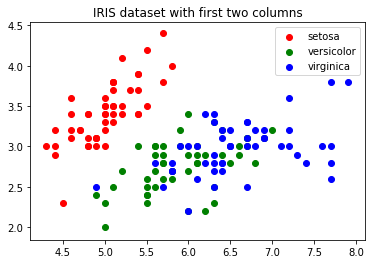

In [4]:
plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('IRIS dataset with first two columns')


### PCA with 2 components 


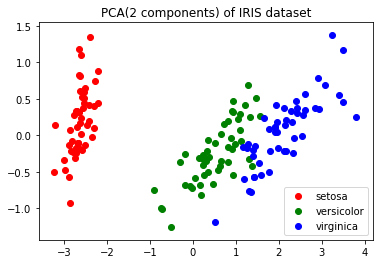

In [5]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
X_r = pca.fit_transform(X)

plt.figure()

for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PCA(2 components) of IRIS dataset')

Note the axis are not the same anymore! They are no longer anything such as "sepal length" or "petal width"

In [6]:
X[:5, :]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [7]:
X_r[:5,]
# only 2 columns!!

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456]])

In [8]:
# KNN with PCAed data
knn = KNeighborsClassifier(n_neighbors=5)
cross_val_score(knn, X_r, y, cv=10, scoring='accuracy').mean()

0.96000000000000019

In [9]:
X_reconstituted = pca.inverse_transform(X_r)
# Turn it back into its 4 column using only 2 principal components

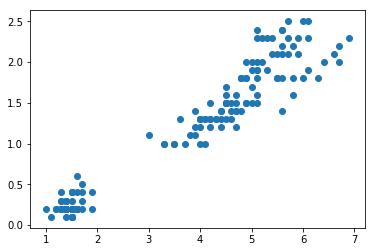

In [10]:
plt.scatter(X[:,2], X[:,3])
# Original Data

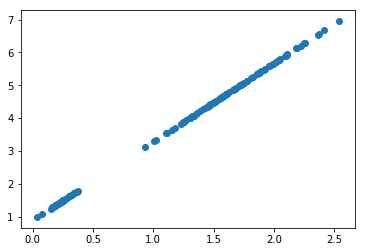

In [11]:
plt.scatter(X_reconstituted[:,3], X_reconstituted[:,2])


### PCA with 3 components 

In [12]:

pca = decomposition.PCA(n_components=3)
pca.fit(X)
X_3 = pca.transform(X)

X_3[:5,]

array([[-2.68420713,  0.32660731, -0.02151184],
       [-2.71539062, -0.16955685, -0.20352143],
       [-2.88981954, -0.13734561,  0.02470924],
       [-2.7464372 , -0.31112432,  0.03767198],
       [-2.72859298,  0.33392456,  0.0962297 ]])

In [ ]:
plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_3[y == i, 0], X_3[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PCA(3 components) of IRIS dataset')

In [ ]:
# KNN with 3 components
knn = KNeighborsClassifier(n_neighbors=5)
cross_val_score(knn, X_3, y, cv=10, scoring='accuracy').mean()

In [ ]:
X_reconstituted = pca.inverse_transform(X_3)

In [ ]:
plt.scatter(X[:,2], X[:,3])
# Original Data

In [8]:
plt.scatter(X_reconstituted[:,2], X_reconstituted[:,3])

NameError: name 'X_reconstituted' is not defined

### choosing components

In [10]:

pca = decomposition.PCA(n_components=4)
X_r = pca.fit_transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [ 0.92461621  0.05301557  0.01718514  0.00518309]


In [12]:

pca.explained_variance_
# below are eigan values

array([ 4.19667516,  0.24062861,  0.07800042,  0.02352514])

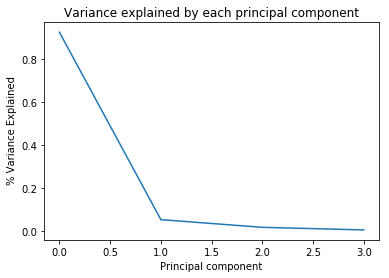

In [13]:
plt.plot(pca.explained_variance_ratio_)
plt.title('Variance explained by each principal component')
plt.ylabel(' % Variance Explained')
plt.xlabel('Principal component')

# 2 components is enough!!

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [50]:

url = 'yelp.csv'
yelp = pd.read_csv(url, encoding='unicode-escape')

# create a new DataFrame that only contains the 5-star and 1-star reviews
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

# define X and y
X = yelp_best_worst.text
y = yelp_best_worst.stars == 5

In [61]:
X[0]

u'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\r\n\r\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\r\n\r\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\r\n\r\nAnyway, I can\'t wait to go back!'

In [66]:
X_short = vect.fit_transform(X[0:1]).A

In [67]:
X_short[0]

array([1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1])

In [51]:
y.value_counts()

True     3337
False     749
Name: stars, dtype: int64

### PART II: PIPELINES

In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [54]:
from sklearn.pipeline import Pipeline

vect = CountVectorizer(stop_words='english')

In [58]:
# removing no features and using sklearn pipelines

# Ask yourself, Why are we using pipelines here?




pipe = Pipeline(steps=[('transform', vect), ('lr', lr)])




In [56]:
cross_val_score(pipe, X, y, cv=10, scoring='accuracy').mean()

0.93245414867556398

In [59]:
X1 = vect.fit_transform(X)

cross_val_score(lr, X1, y, cv=10, scoring='accuracy').mean()

0.93245414867556398

In [68]:
vect = CountVectorizer(stop_words='english', max_features = 1000)
pipe = Pipeline(steps=[('transform', vect), ('lr', lr)])
cross_val_score(pipe, X, y, cv=10, scoring='accuracy').mean()

0.92559557190651665

In [69]:
vect = CountVectorizer(stop_words='english', max_features = 100)
pipe = Pipeline(steps=[('transform', vect), ('lr', lr)])
cross_val_score(pipe, X, y, cv=10, scoring='accuracy').mean()

0.88840775780945491

## EXERCISE ##


### make a pipeline that has
1. a count vectorizer with english stopwords and 1,000 max features
2. a PCA that takes 20 components
3. a logistic regression

THEN cross validate this pipeline








### What's wrong with this code?

In [73]:
vect = CountVectorizer(stop_words='english', max_features=1000)

In [74]:
pca = decomposition.PCA(n_components=20)
print pca

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


In [79]:
svd = decomposition.TruncatedSVD(n_components=20)

In [80]:
pipe = Pipeline(steps=[('transform', vect), ('svd', svd), ('lr', lr)])
print pipe

Pipeline(steps=[('transform', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])


In [81]:
cross_val_score(pipe, X, y, cv=10, scoring='accuracy').mean()

0.88448377152174074

In [77]:
# Didn't work! I'll give you a custom transformer 
# that just makes any sparse matrix into a dense matrix


from sklearn.base import TransformerMixin
class DenseTransformer(TransformerMixin):

    def transform(self, X, y=None, **fit_params):
        return X.todense()

    def fit_transform(self, X, y=None, **fit_params):
        self.fit(X, y, **fit_params)
        return self.transform(X)

    def fit(self, X, y=None, **fit_params):
        return self

In [78]:
vect = CountVectorizer(stop_words='english', max_features=1000)
pca = decomposition.PCA(n_components=20)
dense = DenseTransformer()

pipe = Pipeline(steps=[('transform', vect), ('dense', dense), ('pca', pca), ('lr', lr)])
cross_val_score(pipe, X, y, cv=10, scoring='accuracy').mean()

# Very comparable!

0.88105358866181527

In [ ]:
vect = CountVectorizer(stop_words='english', max_features=1000)
pca = decomposition.PCA(n_components=20)
dense = DenseTransformer()

pipe = Pipeline(steps=[('transform', vect), ('dense', dense), ('pca', pca), ('lr', lr)])


pipe.fit(X, y)

In [ ]:
yelp_best_worst[yelp_best_worst.stars==5].iloc[100].text

In [ ]:
pipe.predict(["""The food was flavorful and plenty of it. """])

In [ ]:
print pipe.predict(["""The food was awful and disgusting. Service took way too long"""])

In [ ]:
vect = CountVectorizer(stop_words='english')
pca = decomposition.PCA(n_components=100)

all_dtm = vect.fit_transform(X).todense()
pca.fit_transform(all_dtm)

plt.plot(pca.explained_variance_ratio_)
plt.title('Variance explained by each principal component')
plt.ylabel(' % Variance Explained')
plt.xlabel('Principal component')

Note that PCA does require scaled data, but because I knew that each column was on the same unit ("words")
I did not need to preform any standardization

In [ ]:
# BONUS SHAKIRA


from pylab import imread, imsave, subplot, imshow, title, gray, figure, show, NullLocator
from numpy import mean, cov, dot, linalg, size, argsort

def princomp(A, numpc=0):
    # computing eigenvalues and eigenvectors of covariance matrix
    M = (A-mean(A.T,axis=1)).T # subtract the mean (along columns)
    [latent,coeff] = linalg.eig(cov(M))
    p = size(coeff,axis=1)
    idx = argsort(latent) # sorting the eigenvalues
    idx = idx[::-1]       # in ascending order
    # sorting eigenvectors according to the sorted eigenvalues
    coeff = coeff[:,idx]
    latent = latent[idx] # sorting eigenvalues
    if numpc < p and numpc >= 0:
        coeff = coeff[:,range(numpc)] # cutting some PCs if needed
    score = dot(coeff.T,M) # projection of the data in the new space
    return coeff,score,latent

A = imread('shakira.png') # load an image
A = mean(A,2) # to get a 2-D array
full_pc = size(A,axis=1) # numbers of all the principal components
i = 1
dist = []
for numpc in range(0,full_pc+10,10): # 0 10 20 ... full_pc
    coeff, score, latent = princomp(A,numpc)
    Ar = dot(coeff,score).T+mean(A,axis=0) # image reconstruction
    # difference in Frobenius norm
    dist.append(linalg.norm(A-Ar,'fro'))
    # showing the pics reconstructed with less than 50 PCs
    print "trying %s principal components with a distance of: %f"%(numpc,dist[-1])
    if numpc <= 50:
        if numpc == 50:
            imsave(fname= ''+str(numpc)+'.png', arr = Ar)
        ax = subplot(2,3,i,frame_on=False)
        ax.xaxis.set_major_locator(NullLocator()) # remove ticks
        ax.yaxis.set_major_locator(NullLocator())
        i += 1
        imshow(Ar)
        title('PCs # '+str(numpc))
        gray()

figure()
imshow(A)
title('numpc FULL')
gray()
show()

# BONUS Face recognition:
+ (This takes a bit)

In [ ]:
# derived from 

# http://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html

In [ ]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
y = lfw_people.target
n_features = X.shape[1]

In [ ]:
X.shape

In [ ]:
plt.imshow(X[0].reshape((h, w)), cmap=plt.cm.gray)
lfw_people.target_names[y[0]]

In [ ]:
plt.imshow(X[100].reshape((h, w)), cmap=plt.cm.gray)
lfw_people.target_names[y[100]]

In [ ]:
# the label to predict is the id of the person
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

In [ ]:
# split into a training and testing set
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1)
# will use x_test as sample OOS data

###############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
pca = decomposition.PCA(n_components=n_components, whiten=True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from time import time

t0 = time()
logreg = LogisticRegression()
print("Fitting the classifier to the training set WITHOUT PCA")
param_grid = {'C': [1e-1,1,1e1]}
clf = GridSearchCV(logreg, param_grid)
clf = clf.fit(X_train, y_train)
clf = clf.best_estimator_

print clf, "best estimator"

###############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
y_pred = clf.predict(X_test)


print accuracy_score(y_pred, y_test), "Accuracy"
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))
print (time() - t0), "seconds"

In [ ]:
logreg = LogisticRegression()
print("Fitting the classifier to the training set")
param_grid = {'C': [1e-1,1,1e1]}
clf = GridSearchCV(logreg, param_grid)
clf = clf.fit(X_train_pca, y_train)
clf = clf.best_estimator_

print clf, "best estimator"

t0 = time()
###############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set WITH PCA")
y_pred = clf.predict(X_test_pca)

print accuracy_score(y_pred, y_test), "Accuracy"
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))
print (time() - t0), "seconds"

In [ ]:
# Use a pipeline to make this process easier

In [ ]:
from sklearn.pipeline import Pipeline
pca = decomposition.PCA(n_components=150, whiten=True)
logreg = LogisticRegression(C=1e-1)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logreg)])

In [ ]:
cv = cross_val_score(pipe, X, y)

In [ ]:
cv

In [ ]:
cv = cross_val_score(logreg, X, y)

In [ ]:
cv

In [ ]:
# BUT for ease:
t0 = time()
logreg.fit(X, y)
logreg.predict(X)
print (time() - t0), "Seconds"

In [ ]:
t0 = time()
pipe.fit(X, y)
pipe.predict(X)
print (time() - t0), "Seconds"

In [ ]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()